## 1.  Load and Explore the Dataset


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try using ISO-8859-1 encoding
df = pd.read_csv("Sales.csv", encoding='ISO-8859-1')

# Basic dataset info
df.shape, df.columns


((51290, 24),
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
        'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
        'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
        'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
        'Profit', 'Shipping Cost', 'Order Priority'],
       dtype='object'))

In [8]:
# Preview the dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


## 2.  Data Cleaning

We handle missing values, remove duplicates, and detect outliers using IQR method.


In [9]:
# Check missing values
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [11]:
# Check missing values
df.isnull().sum()

# Fill missing numeric columns with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Drop rows with remaining NaN values
df.dropna(inplace=True)

# Remove duplicate records
df.drop_duplicates(inplace=True)

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Preview cleaned data
df.head()


C:\Users\ejfai\AppData\Local\Temp\ipykernel_15560\3031163614.py:15: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [12]:
# Detect and remove outliers using IQR for 'Sales' and 'Profit'
for col in ['Sales', 'Profit']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


## 3.  Exploratory Data Analysis (EDA)

We explore trends and relationships using visualizations.


C:\Users\ejfai\AppData\Local\Temp\ipykernel_15560\77448151.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ejfai\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


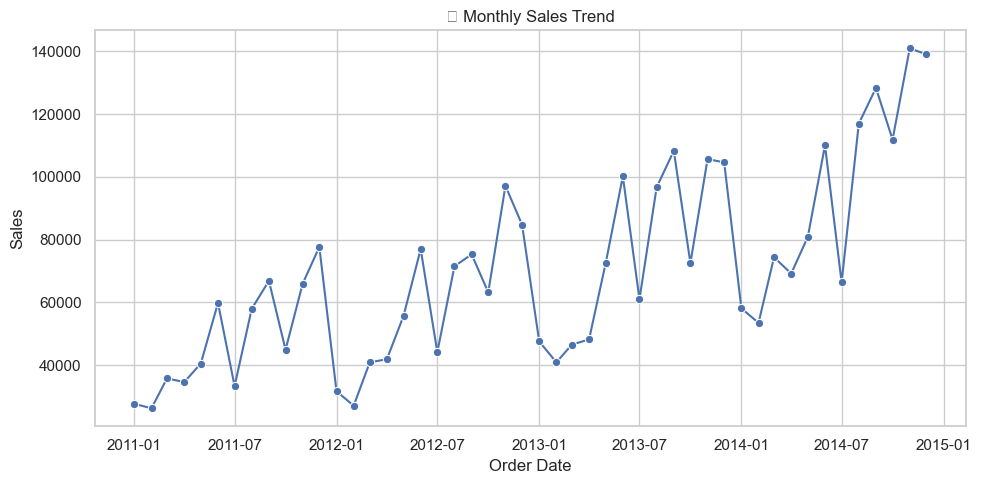

In [13]:
# Sales trend over time
df_monthly = df.groupby(df['Order Date'].dt.to_period('M')).sum(numeric_only=True).reset_index()
df_monthly['Order Date'] = df_monthly['Order Date'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_monthly, x='Order Date', y='Sales', marker='o')
plt.title('📈 Monthly Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ejfai\AppData\Local\Temp\ipykernel_15560\171352351.py:6: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ejfai\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


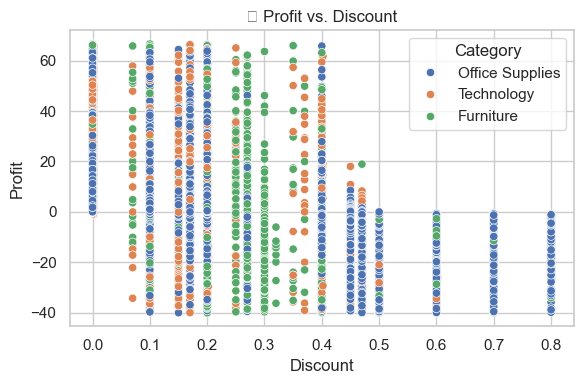

In [14]:
# Profit vs. Discount scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('💰 Profit vs. Discount')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ejfai\AppData\Local\Temp\ipykernel_15560\825018071.py:6: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ejfai\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


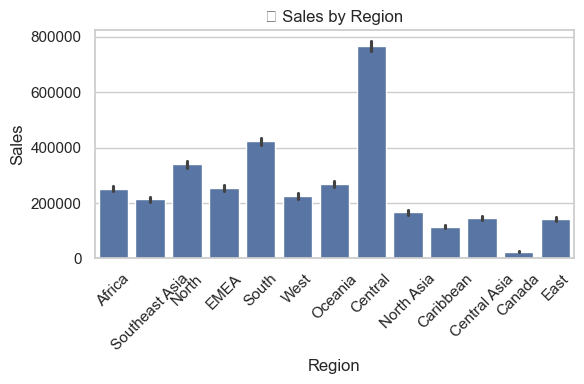

In [15]:
# Sales by Region
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Region', y='Sales', estimator=sum)
plt.title('🌍 Sales by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ejfai\AppData\Local\Temp\ipykernel_15560\1677802706.py:6: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ejfai\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


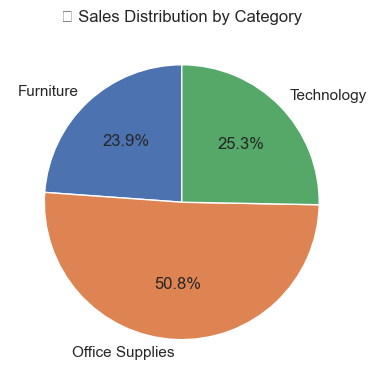

In [16]:
# Sales by Category
plt.figure(figsize=(6, 4))
df.groupby('Category')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('📦 Sales Distribution by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 4.  Predictive Modeling

We use Linear Regression to predict Sales based on Profit and Discount.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection
X = df[['Profit', 'Discount']]
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [18]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📊 R² Score: {r2:.2f}")

📉 Mean Squared Error (MSE): 7994.12
📊 R² Score: 0.16
